{'1': [253, 224, 201], '2': [129, 97, 103], '3': [9, 53, 88], '4': [6, 50, 85]}


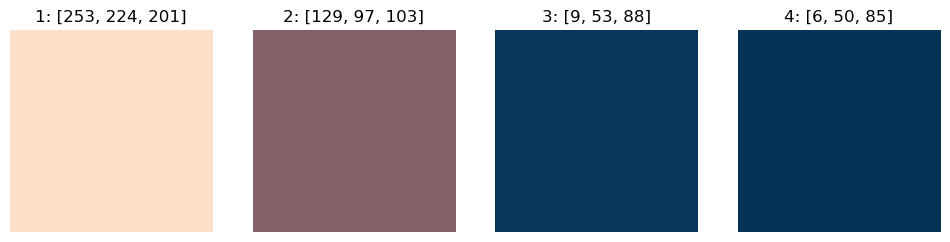

In [12]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 以迴圈載入圖片
image_files = ["segment_1.png", "segment_2.png", "segment_3.png", "segment_4.png"]
images = [Image.open(image_file) for image_file in image_files]

# 以k_means分析圖中佔比第二大的顏色(因為占比最大的顏色通常是背景，所以暫比第二大的顏色通常才是圖片的主要顏色)
def get_second_dominant_color(image, k=4):
    # Convert image to numpy array
    img_np = np.array(image)
    img_np = img_np.reshape((-1, 3))
    
    # Use KMeans 分析顏色
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(img_np)
    
    # 根據樣本點找到個顏色分布
    unique, counts = np.unique(kmeans.labels_, return_counts=True)
    sorted_indices = np.argsort(counts)
    
    # 找出 K-means 聚類算法中第二主要顏色的代表值(找出第二大的群集)
    second_dominant_color = kmeans.cluster_centers_[unique[sorted_indices[-2]]]
    
    return second_dominant_color.astype(int)

# 把第二主要顏色的色碼加入list中
second_dominant_colors = {str(i+1): get_second_dominant_color(img).tolist() for i, img in enumerate(images)}

print(second_dominant_colors)

# 顯示顏色預覽
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
titles = ['1', '2', '3', '4']

for ax, title in zip(axs, titles):
    color = np.array(second_dominant_colors[title]) / 255  # Convert color to numpy array and normalize
    ax.imshow([[color]])
    ax.set_title(f'{title}: {second_dominant_colors[title]}')
    ax.axis('off')

plt.show()
